# PA 2: Classification - Nearest Neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier,kneighbors_graph
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

##External Citation: https://www.datacamp.com/community/tutorials/pandas-read-csv ##

#Loading titanic dataset available in csv format.
df = pd.read_csv("titanic.csv",sep = ',')
#Please modify the first attribute of the read_csv() to point to the the database file available in your local system.



In [2]:
##External Citation: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Pre-Processing the loaded data.

#Checking for missing data.

#total includes the null counts arraged in descending order.
total = df.isnull().sum().sort_values(ascending=False)
#percent_1 calculates the percentage of null values.
percent_1 = df.isnull().sum()/df.isnull().count()*100
#percent_2 rounds the percent_1 to one decimal point and sorts them in the ascending order.
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
#missing_data includes column names with total and percentage values calculated in the above steps.
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
#Displaying the top five records.
missing_data.head(5)




,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [3]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Dropping Cabin feature as nearly 77.1% columns values are missing.As it is nearly entirely empty, it won't be significant for the analysis.
#Drops the Cabin feature from the dataframe.
df=df.drop(['Cabin'], axis=1)



In [4]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Filling out the missing values of age.

#mean stores the mean value of the age.
mean = df["Age"].mean()
#std stores the standard-deviation value of the age.
std = df["Age"].std()
#is_null stores the count of records that are null.
is_null = df["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# age_slice consist of copy of values of age column.
age_slice = df["Age"].copy()
#fill NaN values in age_slice column with random values generated
age_slice[np.isnan(age_slice)] = rand_age
#Assigning updated age_slice values after filling out to age.
df["Age"] = age_slice
#Converting age column type to integer
df["Age"] = df["Age"].astype(int)
#checking if any null values exist after the update
df["Age"].isnull().sum()

0

In [5]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#describing the Embarked column to check most frequent value.
df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [6]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#common_value consist of the most common value of Emabarked.
common_value = 'S'
#Assigning the most common value to the missing two values of Embark.
df['Embarked'] = df['Embarked'].fillna(common_value)


In [7]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Checking for missing data after dropping the columns that are nearly empty and filling out missing data for columns with few missing percentage.

#total includes the null counts arraged in descending order.
total = df.isnull().sum().sort_values(ascending=False)
#percent_1 calculates the percentage of null values.
percent_1 = df.isnull().sum()/df.isnull().count()*100
#percent_2 rounds the percent_1 to one decimal point and sorts them in the ascending order.
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
#missing_data includes column names with total and percentage values calculated in the above steps.
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
#Displaying the top five records.
missing_data.head(5)

,Total,%
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0


In [8]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Converting Features.

#Converting the fare data type as integer.
df['Fare'] = df['Fare'].astype(int)

In [9]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#using the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
# extract titles
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
df['Title'] = df['Title'].map(titles)
# filling NaN with 0, to get safe
df['Title'] = df['Title'].fillna(0)
#Dropping the Name feature as title is extracted and a new feature Title is created out of it.
df = df.drop(['Name'], axis=1)


In [10]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Creating a mapping of male =0 and female =1.
genders = {"male": 0, "female": 1}
#converting the values of sex from male, female to 0,1 using map created in the above step.
df['Sex'] = df['Sex'].map(genders)

In [11]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Describing the 'Ticket' column to check the unique values of 'Ticket'.
df['Ticket'].describe()


count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [12]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Am among 891 values, 681 values are unique.As it consist of more distinct values, it will not be that much important for analysis.
df=df.drop('Ticket' ,axis=1)

In [13]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Creating a mapping of S=0,C=1,Q=2.
ports = {"S": 0, "C": 1, "Q": 2}
#Converting the values of 'Embarked' from S to 0 , C to 1, Q to 2.
df['Embarked'] = df['Embarked'].map(ports)

In [14]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Creating Categories.

#converting 'Age' to integer data type.
df['Age'] = df['Age'].astype(int)

#Converting Age values by dividing them into categories and assiging a value.
#Age less than or equal to 11 values are changed to 1.
#Age between 11-18 as 2, 18-22 as 3,22-27 as 4,27-33 as 5,33-40 as 6,40-66 as 7 and greater than 66 as 8.

df.loc[ df['Age'] <= 11, 'Age'] = 1
df.loc[(df['Age'] > 11) & (df['Age'] <= 18), 'Age'] = 2
df.loc[(df['Age'] > 18) & (df['Age'] <= 22), 'Age'] = 3
df.loc[(df['Age'] > 22) & (df['Age'] <= 27), 'Age'] = 4
df.loc[(df['Age'] > 27) & (df['Age'] <= 33), 'Age'] = 5
df.loc[(df['Age'] > 33) & (df['Age'] <= 40), 'Age'] = 6
df.loc[(df['Age'] > 40) & (df['Age'] <= 66), 'Age'] = 7
df.loc[ df['Age'] > 66, 'Age'] = 8


In [15]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Converting Fare values by dividing them into categories and assiging a value.
#Fare less than or equal to 7.91 values are changed to 0.
#Fares between 7.91 - 14.454 as 1, 14.454 - 31 as 2, 31 - 99 as 3, 99 - 250 as 4 and greater than 250 as 5.
df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare']   = 3
df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare']   = 4
df.loc[ df['Fare'] > 250, 'Fare'] = 5
#converting 'Fare' to integer data type.
df['Fare'] = df['Fare'].astype(int)

In [16]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Creating New Features.

#Adding 'relatives' as the count of number of siblings, spouses, children, parents aboard. As all these people will be part of family, it will be easy to have a column with these details.
#relatives is sum of counts of sibSp and Parch
df['relatives'] = df['SibSp'] + df['Parch']

#Creating an additional column not_alone to represent whether they are alone or not.
#Assigns 0 to not_alone on if relatives value is greater than zero.
df.loc[df['relatives'] > 0, 'not_alone'] = 0
#Assigns 1 to not_alone on if relatives value is equal to zero.
df.loc[df['relatives'] == 0, 'not_alone'] = 1
#converting not_alone to integer data-type.
df['not_alone'] = df['not_alone'].astype(int)
#checking the values of not_alone to check if above conditions are properly implemented or not.
df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [17]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Creating a new column 'Age_class' that is multiplication of age with pclass.
df['Age_Class']= df['Age']* df['Pclass']

In [18]:
##External Citation:https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8 ##

#Creating a new column "Fare_Per_person" that calculates the fare per each person 
#Dividing 'Fare' by 'relatives' +1 count, including the person for whom it is calculated.
df['Fare_Per_Person'] = df['Fare']/(df['relatives']+1)
#converting the 'Fare_Per_person' to integer data type
df['Fare_Per_Person'] = df['Fare_Per_Person'].astype(int)

# Checking the data after completion of pre-processing.
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,relatives,not_alone,Age_Class,Fare_Per_Person
0,0,3,0,3,1,0,0,0,1,1,0,9,0
1,1,1,1,6,1,0,3,1,3,1,0,6,1
2,1,3,1,4,0,0,0,0,2,0,1,12,0
3,1,1,1,6,1,0,3,0,3,1,0,6,1
4,0,3,0,6,0,0,1,0,1,0,1,18,1
5,0,3,0,5,0,0,1,2,1,0,1,15,1
6,0,1,0,7,0,0,3,0,1,0,1,7,3
7,0,3,0,1,3,1,2,0,4,4,0,3,0
8,1,3,1,4,0,2,1,0,3,2,0,12,0
9,1,2,1,2,1,0,2,1,3,1,0,4,1


In [276]:
##External Citation: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html ##

#selecting the 3 best features for traing and testing the model.

#Selected 'Age' ,'Sex' and 'Fare_per_person' features and the target variable 'Survived'. 
#Survived people can be distributed over a range of different age groups. 
#As based on the sex the survival rate can be impacted.
#Similarly based on the Fare_Per_Person the survival rate can be impacted.

#Created subset of features and assigned them to sub_df for traing and testing the model.
sub_df= df[["Sex","Age","Fare_Per_Person","Survived"]]
Y = sub_df['Survived']  #Labels
X = sub_df.drop(['Survived'], axis = 1)  #Features



Text(0, 0.5, 'Accuracy Rate')

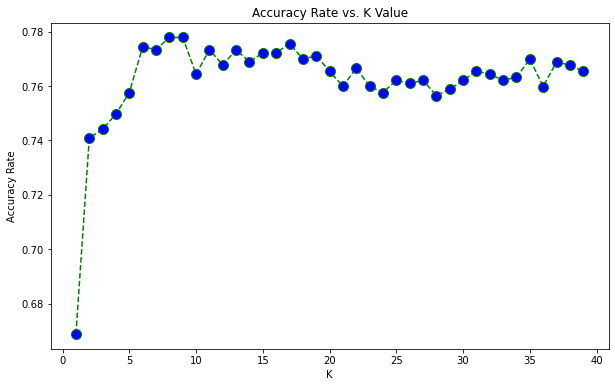

In [277]:
##External Citation: https://towardsdatascience.com/predicting-cardiovascular-disease-using-k-nearest-neighbors-algorithm-614b0ecbf122 ##

#Finding best k based on Accuracy Rate.

#An empty array to store the accuracy rates calculated for different values of nearest-neighbors.
accuracy_rate = []
#For a range of 1-40 nerest neigbor values, nearest neighbor classifier is considered and the score is calculated by croos-validation and accuracy rate is appended for each value of nearest neighbor is appended to the accuracy_rate array.
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,sub_df['Survived'],cv=10)
    accuracy_rate.append(score.mean())

#Specifing the size of figure
plt.figure(figsize=(10,6))
#Plotting the accuracy rates for the range of nearest neigbors.
plt.plot(range(1,40),accuracy_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
#Specifying title of the plot
plt.title('Accuracy Rate vs. K Value')
#Specifying the X-label
plt.xlabel('K')
#Specifying the Y-label
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

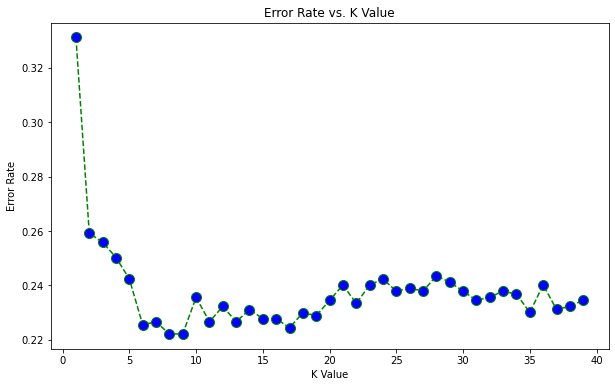

In [278]:
##External Citation: https://towardsdatascience.com/predicting-cardiovascular-disease-using-k-nearest-neighbors-algorithm-614b0ecbf122 ##

#Finding best k based on Error Rate.

#An empty array to store the error rates calculated for different values of nearest-neighbors.
error_rate = []

#For a range of 1-40 nerest neigbor values, nearest neighbor classifier is considered and the score is calculated by croos-validation and error rate is appended for each value of nearest neighbor is appended to the error_rate array.
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,sub_df['Survived'],cv=10)
    error_rate.append(1-score.mean())

#Specifing the size of figure
plt.figure(figsize=(10,6))
#Plotting the accuracy rates for the range of nearest neigbors.
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
#Specifying title of the plot
plt.title('Error Rate vs. K Value')
#Specifying the X-label
plt.xlabel('K Value')
#Specifying the Y-label
plt.ylabel('Error Rate')

In [279]:
#Splitting the 70% data as training set and 30% as testing set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

Confusion Matrix with nearest neighbor 9: 
 [[134  22]
 [ 34  78]]


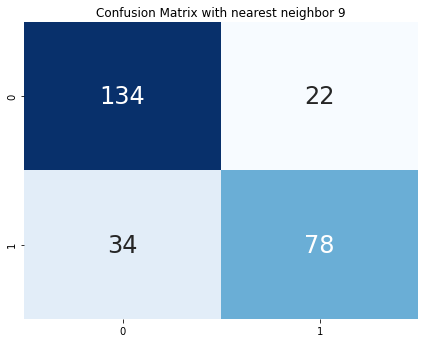


Classification Report with nearest neighbor 9:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       156
           1       0.78      0.70      0.74       112

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [285]:
##External Citation: https://towardsdatascience.com/predicting-cardiovascular-disease-using-k-nearest-neighbors-algorithm-614b0ecbf122 ##

# For Nearest Neighbor : 9

#Initializing the nearest neigbhor classifer by specifying the neighbors using n_neighbors attribute, to consider Euclidean ditance by passing 2 value to attribute p and specifying to consider the distance by passing distance to weights attribute. 
knn_9 = KNeighborsClassifier(n_neighbors=9,p = 2,weights ='distance')
#Traing the model by fitting the train data to the k-nearest neighbor classifier.
knn_9.fit(X_train,y_train)
#Assigning the predicted values of test data set . They are predicted using the model trained in the above steps. 
prediction_9 = knn_9.predict(X_test)

#Displays the Confusion Matrix
print("Confusion Matrix with nearest neighbor 9: \n",confusion_matrix(y_test, prediction_9))
##External Citation: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning ##

#For visulatization of Confusion Matrix.

#Specifing the size of figure
plt.figure(figsize=(24,12))
plt.subplot(2,3,5)
#Specifying title of the plot
plt.title("Confusion Matrix with nearest neighbor 9")
#Plotting Heat-Map for the Confusion Matrix.
sns.heatmap(confusion_matrix(y_test, prediction_9),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#To show the plot
plt.show()

#Displays the Classification Report including precision, recall, f1-score andsupport
print("\nClassification Report with nearest neighbor 9:\n",classification_report(y_test, prediction_9))

Confusion Matrix with nearest neighbor 3: 
 [[135  21]
 [ 41  71]]


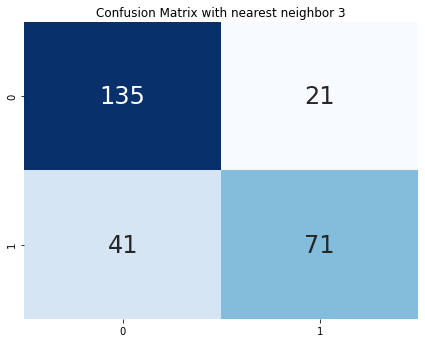


Classification Report with nearest neighbor 3:
               precision    recall  f1-score   support

           0       0.77      0.87      0.81       156
           1       0.77      0.63      0.70       112

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.77      0.76       268



In [281]:
##External Citation: https://towardsdatascience.com/predicting-cardiovascular-disease-using-k-nearest-neighbors-algorithm-614b0ecbf122 ##

# For Nearest Neighbor : 3

#Initializing the nearest neigbhor classifer by specifying the neighbors using n_neighbors attribute, to consider Euclidean ditance by passing 2 value to attribute p and specifying to consider the distance by passing distance to weights attribute. 
knn_3 = KNeighborsClassifier(n_neighbors=3,p = 2,weights ='distance')
#Traing the model by fitting the train data to the k-nearest neighbor classifier.
knn_3.fit(X_train,y_train)
#Assigning the predicted values of test data set . They are predicted using the model trained in the above steps. 
prediction_3 = knn_3.predict(X_test)

#Displays the Confusion Matrix
print("Confusion Matrix with nearest neighbor 3: \n",confusion_matrix(y_test, prediction_3))
##External Citation: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning ##

#For visulatization of Confusion Matrix.

#Specifing the size of figure
plt.figure(figsize=(24,12))
plt.subplot(2,3,5)
#Specifying title of the plot
plt.title("Confusion Matrix with nearest neighbor 3")
#Plotting Heat-Map for the Confusion Matrix.
sns.heatmap(confusion_matrix(y_test, prediction_3),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#To show the plot
plt.show()

#Displays the Classification Report including precision, recall, f1-score andsupport
print("\nClassification Report with nearest neighbor 3:\n",classification_report(y_test, prediction_3))

Confusion Matrix with nearest neighbor 31: 
 [[135  21]
 [ 37  75]]


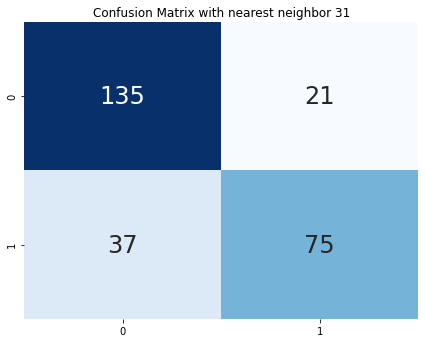


Classification Report with nearest neighbor 31:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       156
           1       0.78      0.67      0.72       112

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [282]:
##External Citation: https://towardsdatascience.com/predicting-cardiovascular-disease-using-k-nearest-neighbors-algorithm-614b0ecbf122 ##

# For Nearest Neighbor : 31

#Initializing the nearest neigbhor classifer by specifying the neighbors using n_neighbors attribute, to consider Euclidean ditance by passing 2 value to attribute p and specifying to consider the distance by passing distance to weights attribute. 
knn_31 = KNeighborsClassifier(n_neighbors=31,p = 2,weights ='distance')
#Traing the model by fitting the train data to the k-nearest neighbor classifier.
knn_31.fit(X_train,y_train)
#Assigning the predicted values of test data set . They are predicted using the model trained in the above steps. 
prediction_31 = knn_31.predict(X_test)

#Displays the Confusion Matrix
print("Confusion Matrix with nearest neighbor 31: \n",confusion_matrix(y_test, prediction_31))
##External Citation: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning ##

#For visulatization of Confusion Matrix.

#Specifing the size of figure
plt.figure(figsize=(24,12))
plt.subplot(2,3,5)
#Specifying title of the plot
plt.title("Confusion Matrix with nearest neighbor 31")
#Plotting Heat-Map for the Confusion Matrix.
sns.heatmap(confusion_matrix(y_test, prediction_31),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#To show the plot
plt.show()

#Displays the Classification Report including precision, recall, f1-score andsupport
print("\nClassification Report with nearest neighbor 31:\n",classification_report(y_test, prediction_31))

Confusion Matrix with nearest neighbor 80: 
 [[135  21]
 [ 36  76]]


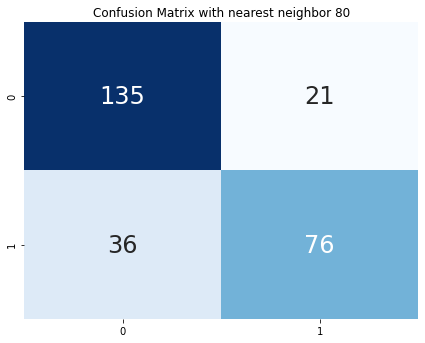


Classification Report with nearest neighbor 80:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       156
           1       0.78      0.68      0.73       112

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [283]:
##External Citation: https://towardsdatascience.com/predicting-cardiovascular-disease-using-k-nearest-neighbors-algorithm-614b0ecbf122 ##

# For Nearest Neighbor : 80

#Initializing the nearest neigbhor classifer by specifying the neighbors using n_neighbors attribute, to consider Euclidean ditance by passing 2 value to attribute p and specifying to consider the distance by passing distance to weights attribute. 
knn_80 = KNeighborsClassifier(n_neighbors=80,p = 2,weights ='distance')
#Traing the model by fitting the train data to the k-nearest neighbor classifier.
knn_80.fit(X_train,y_train)
#Assigning the predicted values of test data set . They are predicted using the model trained in the above steps. 
prediction_80 = knn_80.predict(X_test)

#Displays the Confusion Matrix
print("Confusion Matrix with nearest neighbor 80: \n",confusion_matrix(y_test, prediction_80))
##External Citation: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning ##

#For visulatization of Confusion Matrix.

#Specifing the size of figure
plt.figure(figsize=(24,12))
plt.subplot(2,3,5)
#Specifying title of the plot
plt.title("Confusion Matrix with nearest neighbor 80")
#Plotting Heat-Map for the Confusion Matrix.
sns.heatmap(confusion_matrix(y_test, prediction_80),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#To show the plot
plt.show()

#Displays the Classification Report including precision, recall, f1-score andsupport
print("\nClassification Report with nearest neighbor 80:\n",classification_report(y_test, prediction_80))

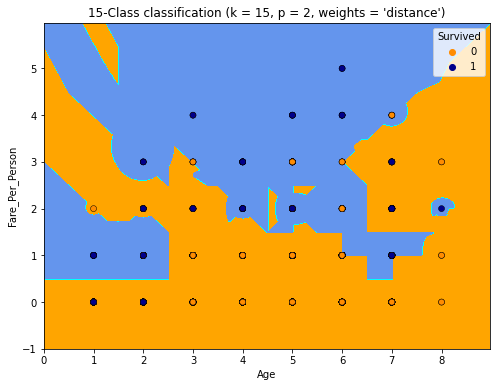

In [284]:
##External Citation: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py ##

#Plotting the classifier in a 2D projection

#Specifying the number of neighbors
n_neighbors = 15
# step size in the mesh
h = .02  
#Considering two features Age and Fare_Per_Person for classification for better representation.
X = sub_df[["Age","Fare_Per_Person"]]
#Considering the Traget Variable 'Survived'
y = sub_df["Survived"]
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'darkblue']

for weights in ['distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors,p=2, weights=weights)
    clf.fit(X, Y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X["Age"].min() - 1, X["Age"].max() + 1                           #Retriving range of 'Age' Feature
    y_min, y_max = X["Fare_Per_Person"].min() - 1, X["Fare_Per_Person"].max() + 1   #Retriving range of 'Fare_Per_Person' Feature
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))     #Creating a grid with the ranges found out in the above steps.
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])                                  #Predicting the values.

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)                     #Shape
    plt.figure(figsize=(8, 6))                  #Size
    plt.contourf(xx, yy, Z, cmap=cmap_light)    #Color

    # Plot also the training points
    sns.scatterplot(x=X["Age"], y=X["Fare_Per_Person"], hue=y,palette=cmap_bold, alpha=1.0, edgecolor="black")   #Plotting
    plt.xlim(xx.min(), xx.max())   #Passing the limit values for 'Age' feature
    plt.ylim(yy.min(), yy.max())   #Passing the limit values for 'Fare_Per_Person' feature
    plt.title("15-Class classification (k = %i, p = %i, weights = '%s')"  % (n_neighbors,2, weights))  #Title of plot
    plt.xlabel("Age")              #X-axis Label
    plt.ylabel("Fare_Per_Person")  #Y-axis Label

plt.show()    #To show the plot

# Report (22 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Describe the Nearest Neighbors method. [5 points]
* Explain what was your criteria for selecting the three attributes. [7 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [5 points]
* Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

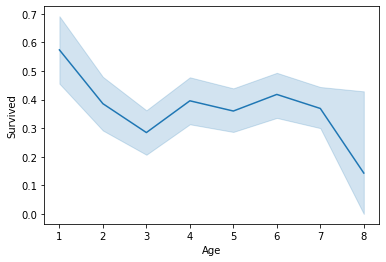

In [23]:
##External Citation: https://www.geeksforgeeks.org/seaborn-lineplot-method-in-python/ ##

#To show how the Survived people chances varied for different range of age groups. 

#Considering Age and Survived columns from the data set
data = df[["Age","Survived"]]
#To draw lineplot
sns.lineplot(x="Age", y="Survived", data=data)
#To show the plot
plt.show()

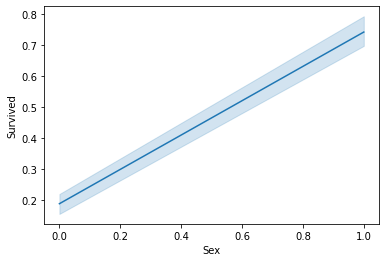

In [24]:
##External Citation: https://www.geeksforgeeks.org/seaborn-lineplot-method-in-python/ ##

#To show how the Survived people chances varied for different sex.

#Considering Sex and Survived columns from the data set
data = df[["Sex","Survived"]]  
# draw lineplot
sns.lineplot(x="Sex", y="Survived", data=data)
#To show the plot
plt.show()

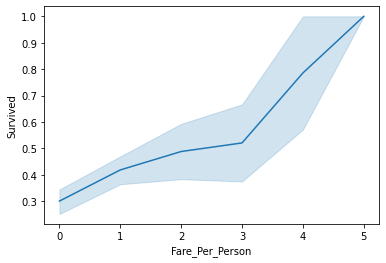

In [25]:
##External Citation: https://www.geeksforgeeks.org/seaborn-lineplot-method-in-python/ ##

#To show how the Survived people chances varied for different Fare_Per_Person values.

#Considering Fare_Per_Person and Survived columns from the data set
data = df[["Fare_Per_Person","Survived"]]  
# draw lineplot
sns.lineplot(x="Fare_Per_Person", y="Survived", data=data)
#To show the plot
plt.show()

               Age  Survived
Age       1.000000 -0.043342
Survived -0.043342  1.000000


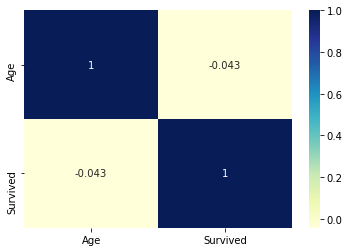

In [26]:
##External Citation: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/ ##

#To show how the Survived people chances varied for different range of age groups. 

#Considering Age and Survived columns from the data set
data = df[["Age","Survived"]]
#To show the correlated data
print(data.corr())
#To plot the correlation heat map 
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
#To show the plot
plt.show()


               Sex  Survived
Sex       1.000000  0.543351
Survived  0.543351  1.000000


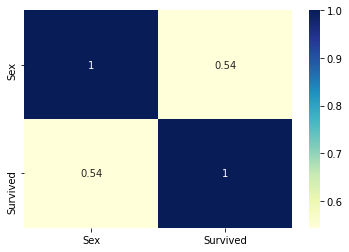

In [27]:
##External Citation: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/ ##

#To show how the Survived people chances varied for different range of age groups. 

#Considering Age and Survived columns from the data set
data = df[["Sex","Survived"]]
#To show the correlated data
print(data.corr())
#To plot the correlation heat map 
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
#To show the plot
plt.show()

                 Fare_Per_Person  Survived
Fare_Per_Person         1.000000  0.188668
Survived                0.188668  1.000000


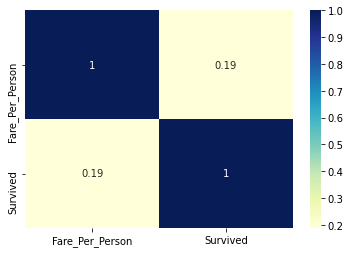

In [28]:
##External Citation: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/ ##

#To show how the Survived people chances varied for different range of age groups. 

#Considering Age and Survived columns from the data set
data = df[["Fare_Per_Person","Survived"]]
#To show the correlated data
print(data.corr())
#To plot the correlation heat map 
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
#To show the plot
plt.show()